In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.iloc[:, 4].where(df['SeniorCitizen'] == 1)

,Dependents
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7038,NaN
7039,NaN
7040,NaN
7041,No


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Task 1: Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:, 4]
customer_5

# Task 2: Extract the 15th column and store it in customer_15
customer_15 = df.iloc[:, 14]
customer_15

#Task 3: Extract all male senior citizens whose payment method is electronic check and store in senior_male_electronic
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)& (df['PaymentMethod'] == 'Electronic check')]

#Task 4: Extract customers whose tenure > 70 months OR monthly charges > $100 into customer_total_tenure
customer_total_tenure = df[(df['tenure']>70)|(df['MonthlyCharges'] > 100)]

#Task 5: Extract customers with two-year contract, payment by mailed check, and churned
churned_customers = df[(df['Contract']== 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]

#Task 6: Extract 333 random records into customer_333
customer_333 = df.sample(n=333, random_state= 42)

#Task 7: Get the count of different levels from the Churn column
churn_count = df['Churn'].value_counts()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

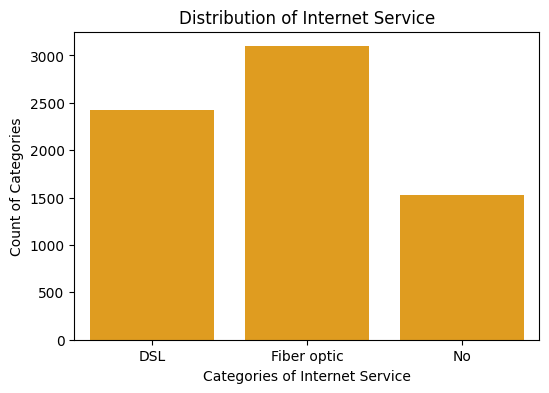

In [7]:
# Building a bar plot for internet service column
plt.figure(figsize = (6,4))
sns.countplot(x = 'InternetService', data = df, color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

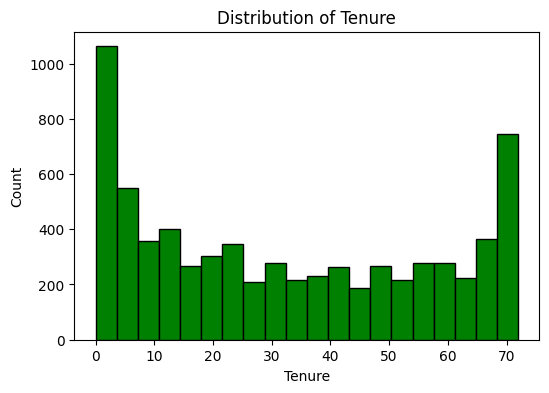

In [8]:
#2. Histogram for tenure
plt.figure(figsize=(6,4))
plt.hist(df['tenure'], bins = 20, color = 'green', edgecolor = 'black')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

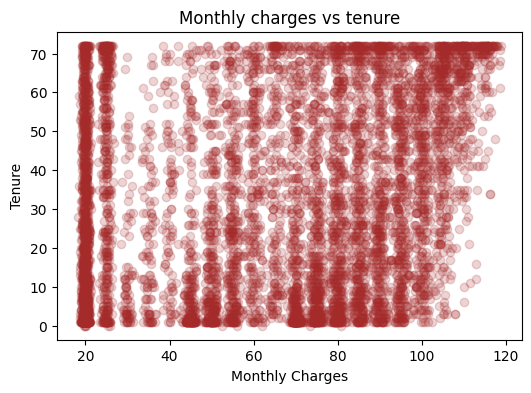

In [9]:
# Scatter Plot: MonthlyCharges vs tenure
plt.figure(figsize = (6,4))
plt.scatter(df['MonthlyCharges'], df['tenure'], color = 'brown', alpha = 0.2)
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.title('Monthly charges vs tenure')
plt.show()

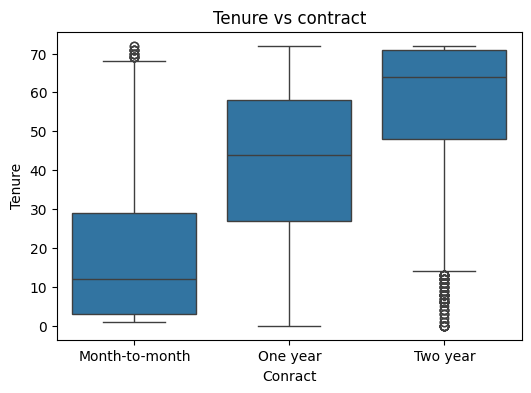

In [10]:
#Box Plot: tenure vs Contract
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'Contract', y = 'tenure', data = df)
plt.xlabel('Conract')
plt.ylabel('Tenure')
plt.title('Tenure vs contract')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
## Linear Regression
# Define Input (X) and Output (y)
x = df[['tenure']]
y = df['MonthlyCharges']

# Split the Dataset into Train and Test Sets (70:30 ratio)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3, random_state= 42)

# Build and Train the Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predict Values on Test Set
y_pred = lr_model.predict(x_test)

# Calculate the Error in Prediction
error = y_test - y_pred

print(error.head())

#Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
Name: MonthlyCharges, dtype: float64
29.07936015646814


In [13]:
#Simple Logistic Regression
df['Churn_encoded'] = df['Churn'].map({ 'No':0 , 'Yes':1})

# define x and y variable

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

x = df[['MonthlyCharges']]
y = df['Churn_encoded']

# Split Dataset (65:35 ratio)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.35, random_state = 42)

# Build and Train Model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Predict and Evaluate
y_pred = log_reg.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[1797    0]
 [ 669    0]]
0.7287104622871047


In [25]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# defining the features
x = df[['tenure']]
y = df['Churn_encoded']

# spliting dataset in 80:20 seniro
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Build and train decisiontree model
df_model = DecisionTreeClassifier(random_state= 42)
df_model.fit(x_train, y_train)

# Predict on Test Set
y_pred = df_model.predict(x_test)

# Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[951  85]
 [257 116]]
0.7572746628814763


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
x= df[['tenure', 'MonthlyCharges']]
y = df['Churn_encoded']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(conf_matrix)
print(accuracy)

[[1341  198]
 [ 308  266]]
0.7605300520586843
